#task5 
question - You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data? You can choose any of the tool of your choice

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"F:\Data analysis files\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [5]:
df.shape

(9994, 13)



EDA



#droping Country as all the products is from USA 

In [6]:
df = df.drop(["Country"],axis=1 )
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [8]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

#Lets see how sub-categories are distributed wrt to category

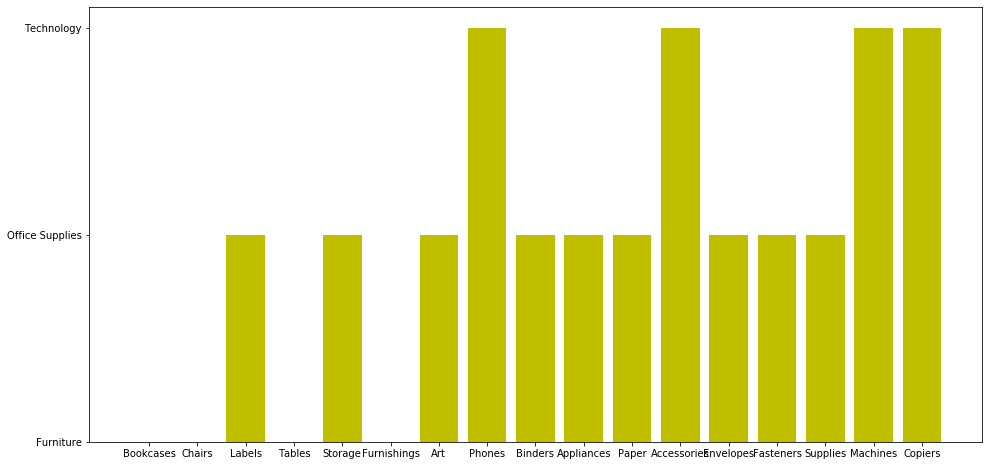

In [9]:

plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df,color='y')
plt.show()

#Total Profit and Sales per Sub-Category

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


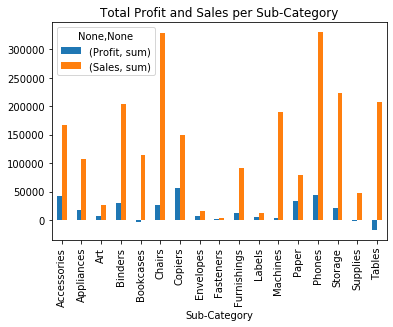

In [10]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
# plt.legend('Profit')
# plt.legend('Sales')
plt.show()

#Count of Sub-Category region wise

#looks like people in West and East order from Online stores than South and Central

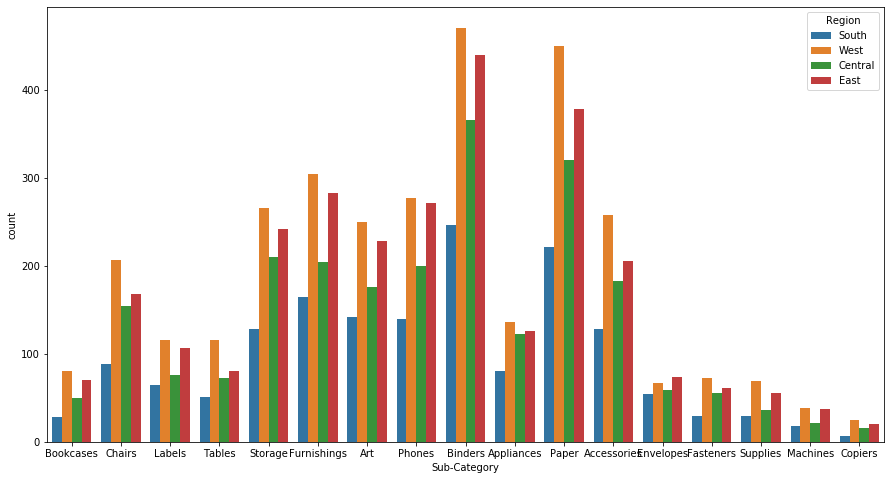

In [11]:

plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

In [20]:
#Distribution of Top 10 Products

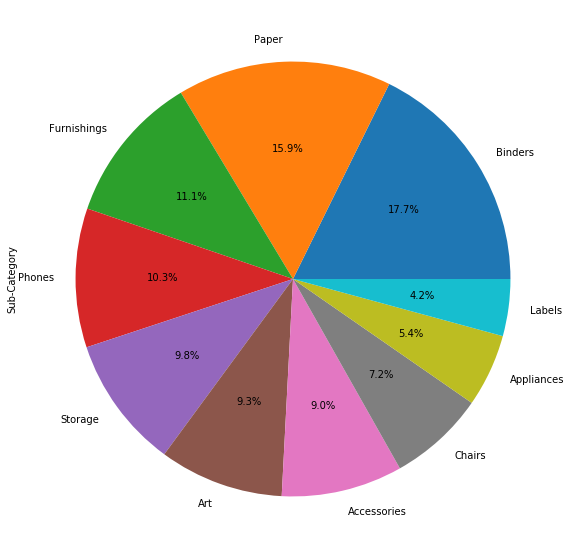

In [12]:

plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().head(10).plot.pie(autopct="%1.1f%%")

In [13]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
filter=df['Category']=="Office Supplies"
df.groupby('Category')['City'].count()

Category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: City, dtype: int64

#West and east region needs more Office Supplies that states that in both the region there are many Companies 

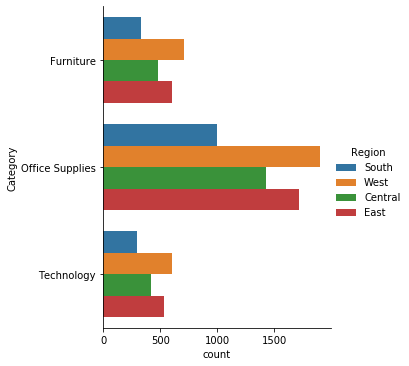

In [22]:
sns.catplot(y="Category", hue="Region", kind="count",data=df);


In [16]:
df['Cost Price'] = df['Sales'] - df['Profit']
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost Price
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516


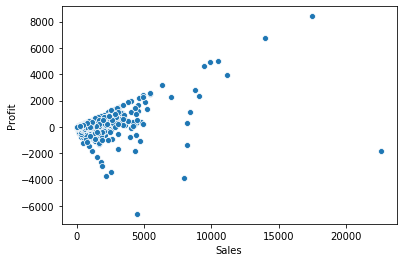

In [23]:
sns.scatterplot("Sales",'Profit',data=df)


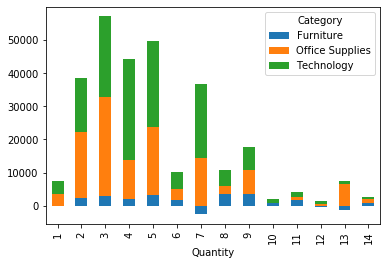

In [18]:
pd.crosstab(df["Quantity"],df["Category"],df["Profit"],aggfunc='sum').plot(kind="bar",stacked=True)